<a href="https://colab.research.google.com/github/nikunjsonule/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Why Airbnb Booking analysis is so important ?

Airbnb makes money by charging guests and hosts for short-term rental stays in private homes or apartments booked through the Airbnb website.The short-term rental business has seen good growth in the past decade. 

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.  Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.



# We will analysis some problem related to Airbnb Bookings



1. What are all neighbourhood groups ?
2. What are availability of number of days for room when listing is available for booking ?
3. Analysis based on room type.
4.  Analysis of the neighbourhood group based on Latitude and Longitude.
5. What are Price Exploration ?
6. What are price based on the Availability 365 ?
7. Relation between neighbourhood group and Availability of number of days for room.
8. How much property owned by each neighbourhood groups ?
9. Property distribution on room type.
10. Correlation to understand the relation of each data.




Dataset contain:

* id: listing ID

* name: name of the listing

* host_id: host ID

* host_name: name of the host

* neighbourhood_group: location

* neighbourhood: area

* latitude: latitude coordinates

* longitude: longitude coordinates

* room_type: listing space type

* price: price in dollars

* minimum_nights: amount of nights minimum

* number_of_reviews: number of reviews

* last_review: latest review

* reviews_per_month: number of reviews per month

* calculated_host_listings_count: amount of listing per host

* availability_365: number of days when listing is available for booking

In [ ]:
!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
import plotly.express as px
from scipy.stats import pearsonr

     |████████████████████████████████| 10.1 MB 8.0 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=4b1ffab10f3b357632e63efb987349e97cc0b9fb5037cbd1e29c39b25e7f1c21
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


Importing and dispalying dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All project/EDA/AirBnB Booking/Airbnb NYC 2019.csv")

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Copying dataset so our original dataset remain unchanged 

In [ ]:
#copying to airbnb_copy
airbnb_copy = data.copy()

In [ ]:
airbnb_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Data types in dataset
airbnb_copy.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
airbnb_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_copy.shape

(48895, 16)

In [ ]:
airbnb_copy.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
#check null values in Data frame
airbnb_copy.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#For Nan Values in column reviews_per_month,replacing Nan with 0
airbnb_copy.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
# drop duplicate values in data frame
airbnb_copy = airbnb_copy.drop_duplicates()

In [ ]:
airbnb_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_copy.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Now we are ready for the analysis of a problem

# General and Business Analysis

**Analysis no.1**

 What are all neighbourhood groups ?

In [ ]:
airbnb_copy['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Neighbourhood Group')

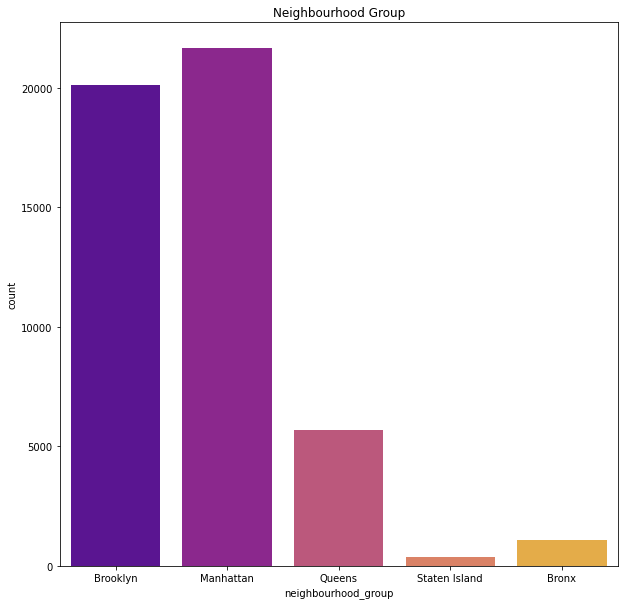

In [ ]:
#plotting barchart for neighbourhood group uniquely
sns.countplot(airbnb_copy['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

By the above bar chart we can see Manhatten has the highest number count in negihbourhood_group. Followed by Manhatten second is Brookyln in number count and others Queens, Bronx and Staten Island.

**Analysis no.2**

 What are availability of number of days for room when listing is available for booking ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



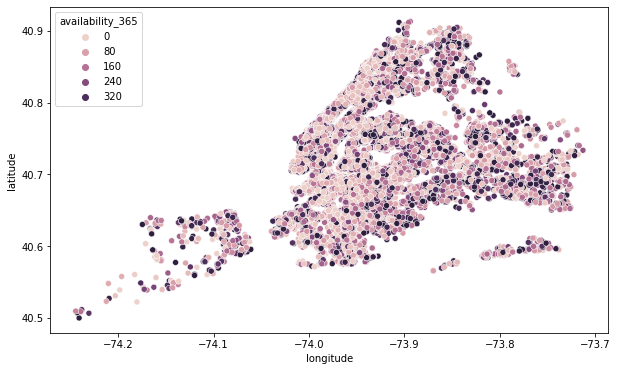

In [ ]:
#distribution of availability_365 by longitude and latitude 
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_copy.longitude,airbnb_copy.latitude,hue=airbnb_copy.availability_365)
plt.ioff()

Availability of number of days for room is quite vary in latitude and longitude. The more number of distribution can be observe in latitude above 40.50 to 40.91 and longitude ranging from -74.16 till -73.88.

**Analysis no.3**

 Analysis based on room type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



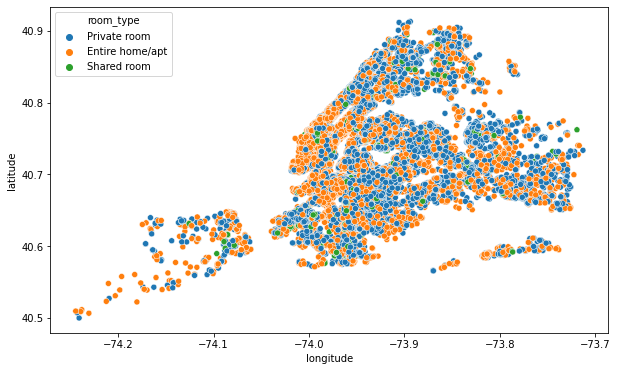

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_copy.longitude,airbnb_copy.latitude,hue=airbnb_copy.room_type)
plt.ioff()

As per the dataset, we can see three types in room. Based on the scatter plot we can see very less number of 'shared room' but 'private room' and 'entire home/apt' are more occupied by people. 

**Analysis no.4**

 Analysis of the neighbourhood group based on Latitude and Longitude

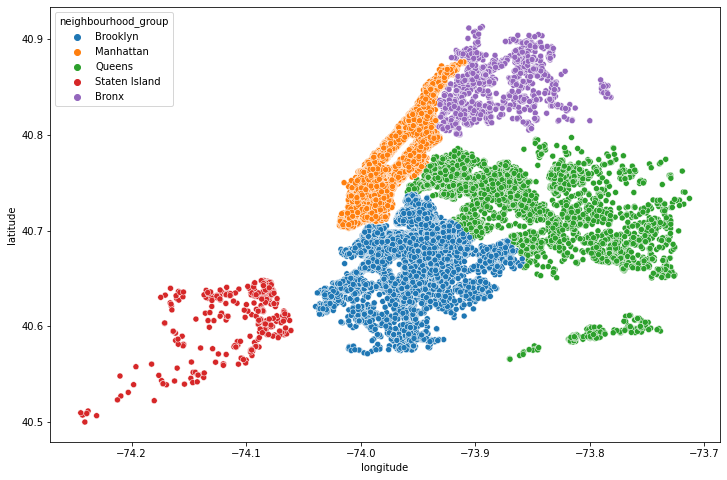

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=airbnb_copy.longitude,y=airbnb_copy.latitude,hue=airbnb_copy.neighbourhood_group)
plt.show()

So based on the above analysis we can observe different types of 'neighbourhood group' by measuring latitude and longitude. Staten Island is quite away from all those groups.

**Analysis no.5**

What are the Price Exploration ?

In [ ]:
# checking if there is any null value present in the price column .
airbnb_copy.price.isna().sum()

0

And from the below, it looks like we don't have any null value to take care of

In [ ]:
airbnb_copy['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

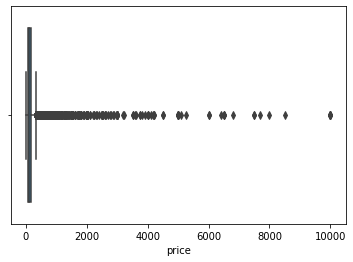

In [ ]:
figsize=(12,8)
sns.boxplot(x='price',data=airbnb_copy)

From above box plot we can understand that data is spread out for high ranges for the price irrespective of region.

**Analysis no.6**

What are price based on the Availability 365 ?

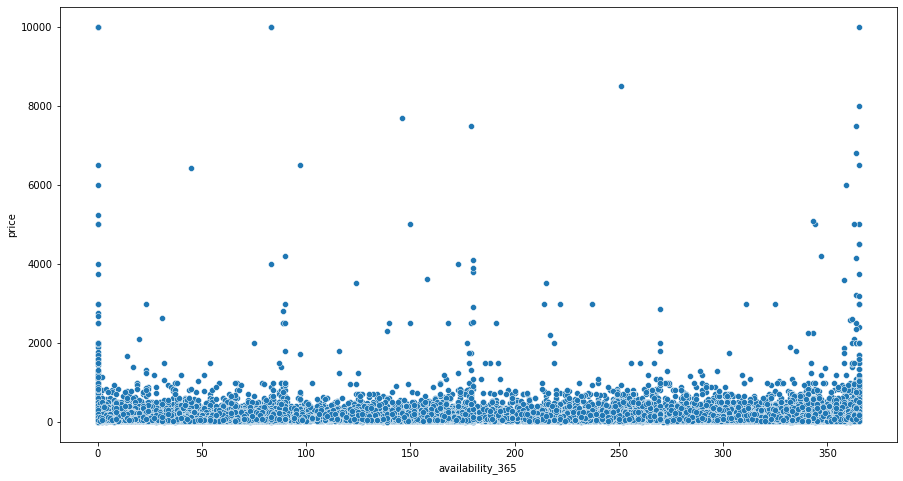

In [ ]:
#creating scatter plot to understand various price factor on different 'availability_365'
plt.figure(figsize=(15,8))
sns.scatterplot(y= airbnb_copy['price'],x= airbnb_copy['availability_365'])


Analysing from above there is any price increase based on the availability and looking below the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

**Analysis no.7**

Relation between neighbourhood group and Availability of number of days for room

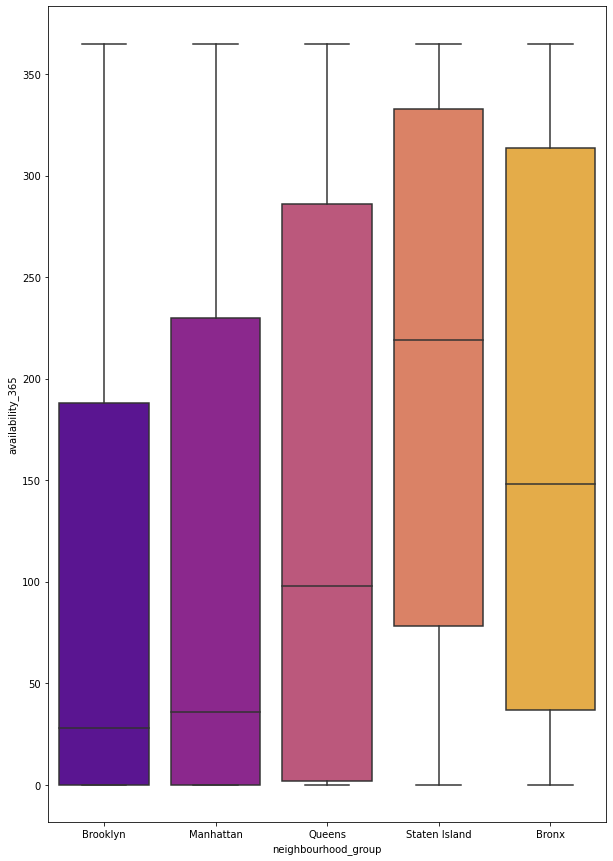

In [ ]:
#box plot to show minimum and maximum to understand available of rooms
plt.figure(figsize=(10,15))
ax = sns.boxplot(data=airbnb_copy, x='neighbourhood_group',y='availability_365',palette='plasma')

The image above is a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

* For Brooklyn the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 0 - 185 where median is 25.

* For Manhattan the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 0 - 230 where median is 30.

* For Queens the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 2 - 280 where median is 95.

* For Staten Island the plot varies between minimum 0 to maximum 365. The Q1 and Q3 for that is 75-325 where median is 220.

* For Bronx the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 30-312 where median is 150.

Availability 365 and neighbourhood group shows how the number of days were available for bookings in different five types region. The most minimum available is for Brooklyn and Manhattan which is Q1 of 25% shows of zero value but for Brooklyn Q3 is nearly 185 and for Manhattan Q3 is nearly 230. It also shows vary in median too.

All this in comparison makes a lot difference is in Staten Island with Q1 with 75 available and Q3 with 325. The median also show quite high i.e 220.


**Analysis no.8**

 How much property owned by each neighbourhood groups ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



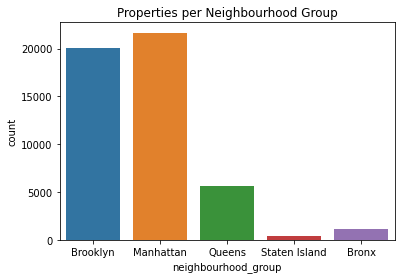

In [ ]:
#how much properties are owned by each neighbourhood groups
title = 'Properties per Neighbourhood Group'
sns.countplot(airbnb_copy['neighbourhood_group'])
plt.title(title)
plt.ioff()

Manhattan has the highest above 20k count properties in the 'neighbourhood_group' followed by Brooklyn with exactly 20k.

**Analysis no. 9**

Property distribution on room type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



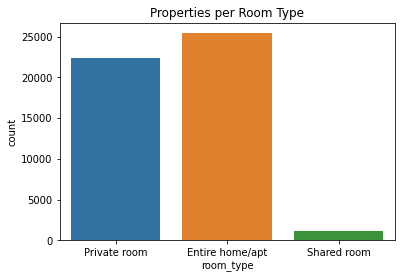

In [ ]:
#representing properties as per room type 
title = 'Properties per Room Type'
sns.countplot(airbnb_copy['room_type'])
plt.title(title)
plt.ioff()

As per analysis 'Entire home/apt' has the highest properties as per room type. It can possible that people don't prefer 'Shared room'.

In [ ]:
#how many rooms are present in each room type
print(airbnb_copy['room_type'].value_counts())

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


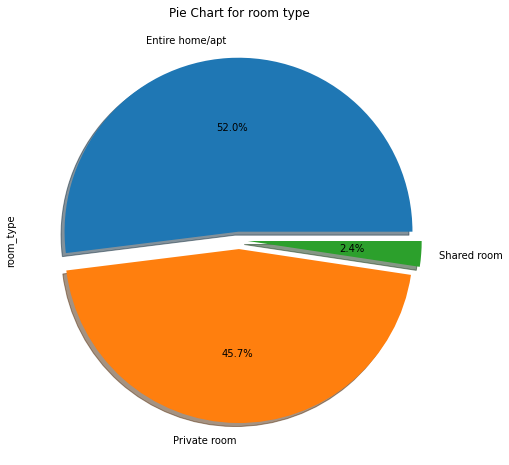

In [ ]:
#how room type is been divide in percentage by pie chart
airbnb_copy['room_type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for room type')
plt.show()

The pie chart also signifies the same analysis. We can observe 'Entire home/apt' is 52%, 'Private room" is 45.7% and lastly 'Shared room' is 2.4% which is very low.

**Analysis no.10**

 Correlation to understand the relation of each data.

In [ ]:
#shows all numeric feature in tabular form to understand
airbnb_copy.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


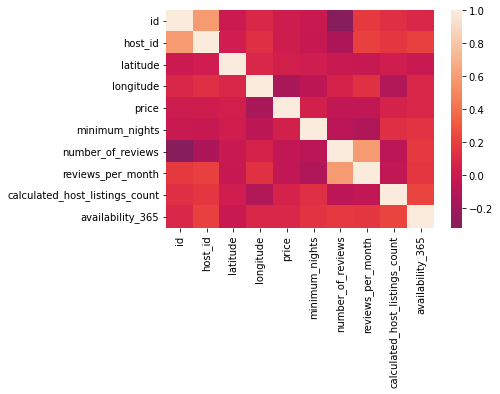

In [ ]:
#simple heatmap representaion to show all numeric feature data from dataset
sns.heatmap(airbnb_copy.corr(), cmap= 'rocket',center=0)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

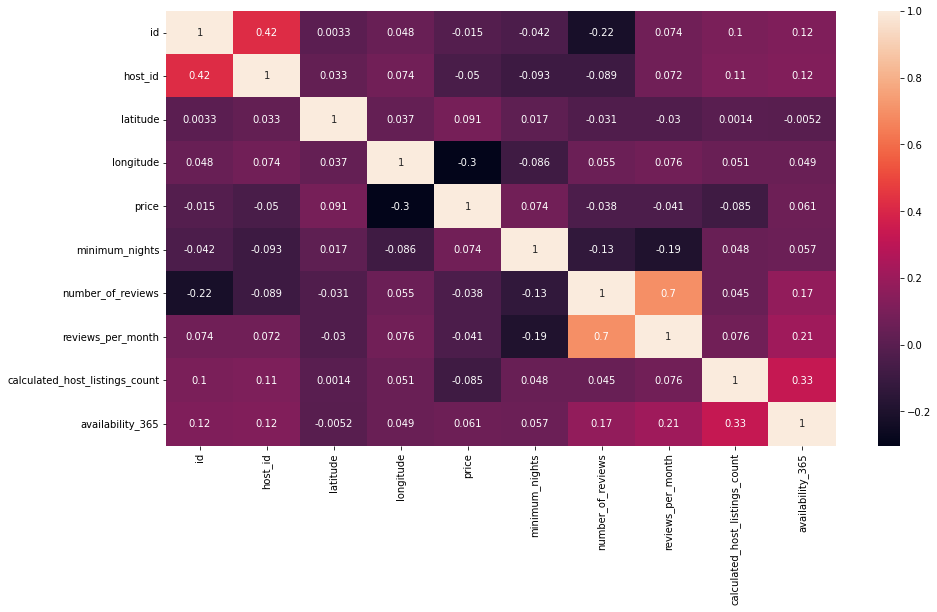

In [ ]:
corr = airbnb_copy.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb_copy.columns

We can see the correlation of data, stated that number_of_reviews and reviews_per_month are highly correlated with 0.7 value. If we want we can drop one of feature to help for further analysis and prediction more clear. 

# Conclusion


That's how I have accomplished my Airbnb Booking Analysis project.

Throughout the project I've learn many new things right from taking problem statement to understand the technical side of a product to analysis. We deal with missing data and outliers. Python has helped a lot to understand with libraries.

To deal with those data was really fun with many different analysis. Data cleaning and dealing with duplicate value was also most important to deal with correct methodology. Understand the dataset and predicting the solution of the problem from team work was also great big task.

Today, Airbnb became one of a kind service that is used and recognized by the whole world. Like in cost-benefit analysis:
*  Airbnb is clearly a business competing with hotel lodging, it should be subject to the same taxation regime as hotels.
* City residents likely suffer when Airbnb circumvents zoning laws that ban lodging businesses from residential neighborhoods.
* The shift from traditional hotels to Airbnb lodging leads to less-reliable tax payments to cities.

And many more.

Exploratory data analysis helps to understand about data and business to know well and grow in the industry.
By gathering data on the opinion of customers, you can not only make your business reliable and convenient to them but also increase your market share.